In [111]:
#load dataset with pandas
import numpy as np
import pandas as pd
# https://gist.github.com/netj/8836201
data = pd.read_csv('iris.csv')
data.head()
#data.sample(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [112]:
#load dataset from sklearn
from sklearn import datasets
dskl = datasets.load_iris()
print(dskl['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [114]:
data.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [115]:
data.shape

(150, 5)

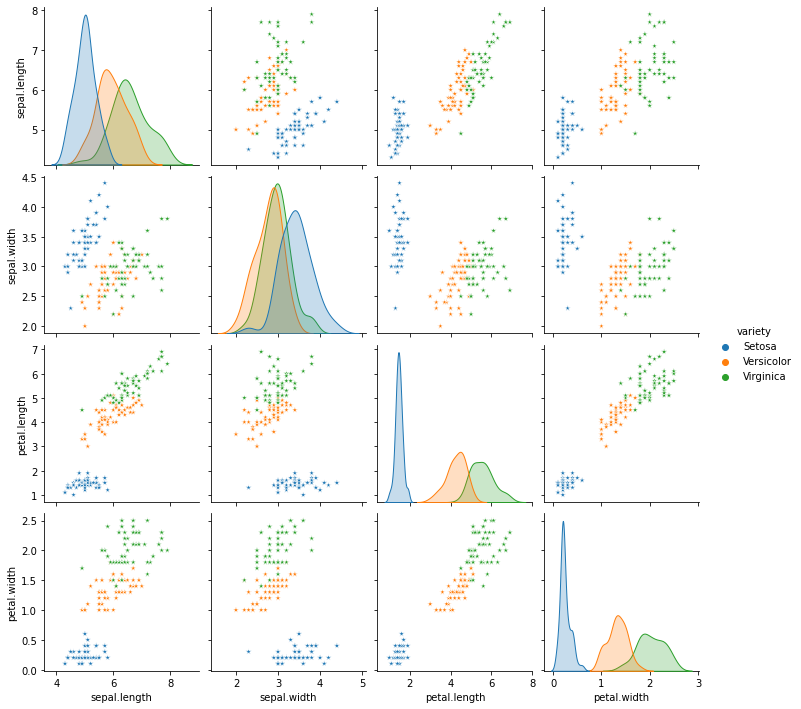

In [116]:
#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sb
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
g = sb.pairplot(data, hue='variety', markers='*')
plt.show()

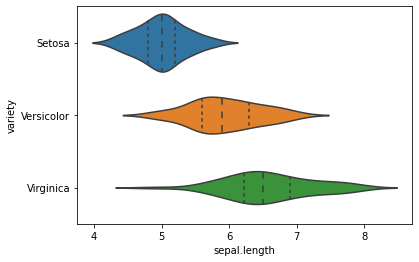

In [117]:
# https://seaborn.pydata.org/generated/seaborn.violinplot.html
g = sb.violinplot(y='variety', x='sepal.length', data=data, inner='quartile') #inner = 'box'
plt.show()

In [118]:
#split X, y
y = data['variety']
X = data.drop('variety', axis=1)
print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print("X_train shape : {}, y_train shape : {}.".format(X_train.shape, y_train.shape))
print("X_test shape : {}, y_test shape : {}.".format(X_test.shape, y_test.shape))

X_train shape : (90, 4), y_train shape : (90,).
X_test shape : (60, 4), y_test shape : (60,).


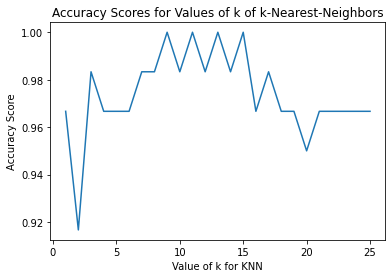

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [121]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [122]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)
knn.predict([[6, 3, 4, 2]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Versicolor'], dtype=object)

In [123]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

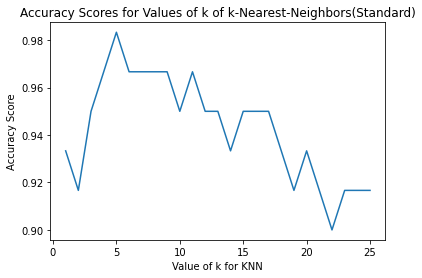

In [124]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors(Standard)')
plt.show()

In [125]:
for i in range(0,25):
  print("k = {} ====> accuracy = {}".format(i+1, scores[i]))

k = 1 ====> accuracy = 0.9333333333333333
k = 2 ====> accuracy = 0.9166666666666666
k = 3 ====> accuracy = 0.95
k = 4 ====> accuracy = 0.9666666666666667
k = 5 ====> accuracy = 0.9833333333333333
k = 6 ====> accuracy = 0.9666666666666667
k = 7 ====> accuracy = 0.9666666666666667
k = 8 ====> accuracy = 0.9666666666666667
k = 9 ====> accuracy = 0.9666666666666667
k = 10 ====> accuracy = 0.95
k = 11 ====> accuracy = 0.9666666666666667
k = 12 ====> accuracy = 0.95
k = 13 ====> accuracy = 0.95
k = 14 ====> accuracy = 0.9333333333333333
k = 15 ====> accuracy = 0.95
k = 16 ====> accuracy = 0.95
k = 17 ====> accuracy = 0.95
k = 18 ====> accuracy = 0.9333333333333333
k = 19 ====> accuracy = 0.9166666666666666
k = 20 ====> accuracy = 0.9333333333333333
k = 21 ====> accuracy = 0.9166666666666666
k = 22 ====> accuracy = 0.9
k = 23 ====> accuracy = 0.9166666666666666
k = 24 ====> accuracy = 0.9166666666666666
k = 25 ====> accuracy = 0.9166666666666666


In [126]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
knn.predict([[6, 3, 4, 2]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Versicolor'], dtype=object)